In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import spacy
from textblob import TextBlob


### **Loading the Amazon product reviews data**

In [35]:
data = pd.read_csv("/kaggle/input/reviews/reviews.csv")
data


,Reviewer Name,Reviews
0,Ashutosh Yadav,It has good runtime. Regular use may run upto ...
1,PIYUSH,I'm a JBL fan. Compared to JBL (and other high...
2,Ashutosh Yadav,1.Cable quality is moderate.2.Hearing butts it...
3,Ashutosh Yadav,I have been using same model from last one and...
4,Deepak,The product is good but the earphone is not fi...
...,...,...
105,KRISHAN,"Good in battery backup, sound is very good."
106,Good product,Everything is good bass is on the next level b...
107,Good product,ITS BEEN 2 LONG YEARS AND INSPITE OF MY REGULA...
108,Ashutosh Yadav,Thankyou so much Amazon and boat to make this ...


### Replace NaN values with an empty string

In [36]:
data['Reviews'] = data['Reviews'].fillna('')

In [37]:
# Convert all reviews to lowercase
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Remove punctuation marks
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','', regex=True)

# Remove stop words
stop_words = set(STOPWORDS)
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))

### Performing sentiment analysis on each review using TextBlob

In [42]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity
    if Sentiment > 0:
        return 'positive'
    elif Sentiment < 0:
        return 'negative'
    else:
        return 'neutral'


data["Sentiment"] = data["Reviews"].apply(get_sentiment)
data

,Reviewer Name,Reviews,Sentiment
0,Ashutosh Yadav,good runtime regular use may run upto 34 days ...,0.078750
1,PIYUSH,im jbl fan compared jbl high end brands qualit...,0.030000
2,Ashutosh Yadav,1cable quality moderate2hearing butts fit eari...,0.200000
3,Ashutosh Yadav,using model last one half year performance goo...,0.133333
4,Deepak,product good earphone fitting ear falling,0.600000
...,...,...,...
105,KRISHAN,good battery backup sound good,0.600000
106,Good product,everything good bass next level ear tips heavy...,0.020000
107,Good product,2 long years inspite regular daily usage still...,0.441667
108,Ashutosh Yadav,thankyou much amazon boat make earphone thanky...,0.200000


#### **Creating a word cloud to show the most frequent words in the reviews**

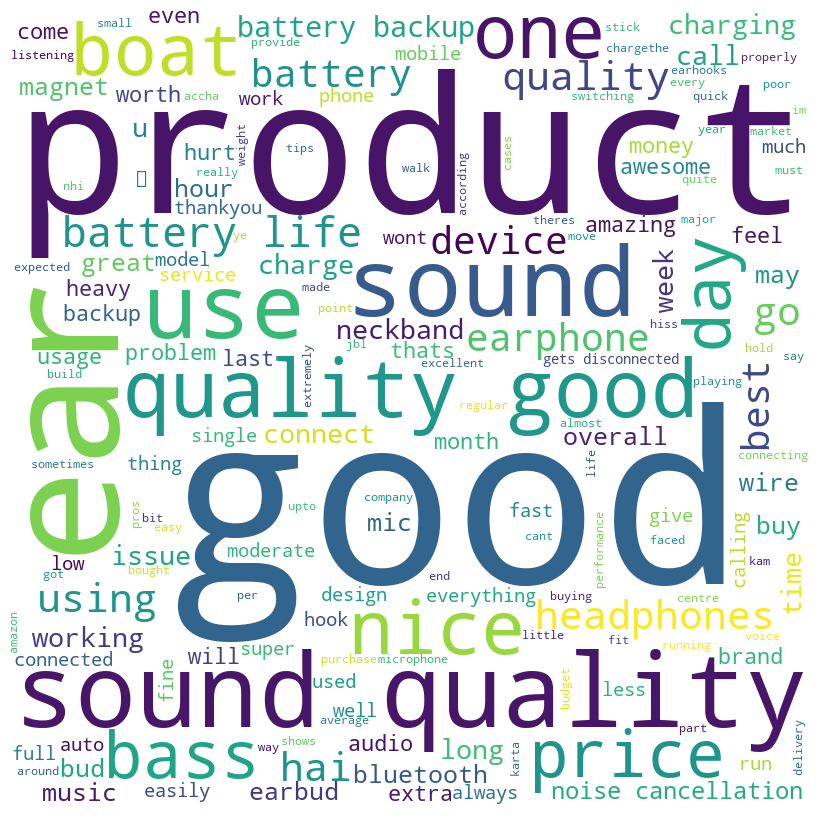

In [43]:
wordcloud = WordCloud(width=800, height=800, background_color="white", min_font_size=10).generate(" ".join(data["Reviews"]))
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<AxesSubplot:xlabel='Sentiment', ylabel='Count'>

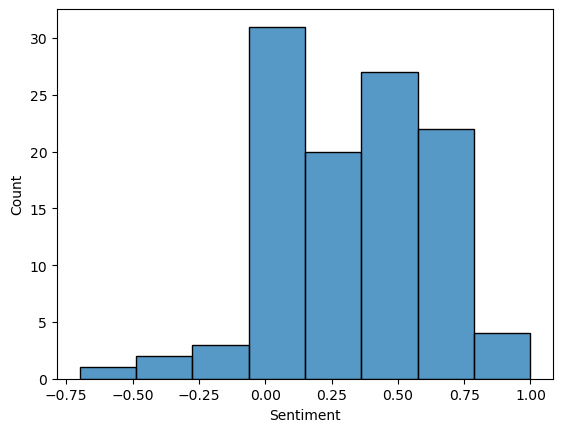

In [46]:
# Seaborn
sns.histplot(data['Sentiment'])